# **Assignment \#2**: Machine Learning MC886/MO444
University of Campinas (UNICAMP), Institute of Computing (IC)

Prof. Sandra Avila, 2022s2



In [ ]:
# TODO: RA & Name

## Objective

Explore **linear regression** and **logistic regression** alternatives and come up with the best possible model for the problems, avoiding overfitting. In particular, predict the performance of students from public schools in the state of São Paulo based on socioeconomic data from SARESP (School Performance Assessment System of the State of São Paulo, or Sistema de Avaliação de Rendimento Escolar do Estado de São Paulo) 2021.

### Dataset

These data were aggregated from [Open Data Platform of the Secretary of Education of the State of São Paulo](https://dados.educacao.sp.gov.br/) (*Portal de Dados Abertos da Secretaria da Educação do Estado de São Paulo*). The dataset is based on two data sources: [SARESP questionnaire](https://dados.educacao.sp.gov.br/dataset/question%C3%A1rios-saresp) and [SARESP test](https://dados.educacao.sp.gov.br/dataset/profici%C3%AAncia-do-sistema-de-avalia%C3%A7%C3%A3o-de-rendimento-escolar-do-estado-de-s%C3%A3o-paulo-saresp-por), conducted in 2021 with students from the 5th and 9th year of Primary School and 3rd year of Highschool. The questionnaire comprehends 63 socio-economical questions, and it is available at the [link](https://dados.educacao.sp.gov.br/sites/default/files/Saresp_Quest_2021_Perguntas_Alunos.pdf ) ([English version](https://docs.google.com/document/d/1GUax3wwYxA43d3iNOiyCRImeCHgx8vUJrHlSzzYIXA4/edit?usp=sharing)), and the test is composed of questions of Portuguese, Mathematics, and Natural Sciences.


**Data Dictionary**:

- **CD_ALUNO**: Student ID;

- **CODESC**: School ID;

- **NOMESC**: School Name;

- **RegiaoMetropolitana**: Metropolitan region;

- **DE**: Name of the Education Board;

- **CODMUN**: City ID;

- **MUN**: City name;

- **SERIE_ANO**: Scholar year;

- **TURMA**: Class;

- **TP_SEXO**: Sex (Female/Male);

- **DT_NASCIMENTO**: Birth date;

- **PERIODO**: Period of study (morning, afternoon, evening);

- **Tem_Nec**: Whether student has any special needs (1 = yes, 0 = no);

- **NEC_ESP_1** - **NEC_ESP_5**: Student disabilities;

- **Tipo_PROVA**: Exam type (A = Enlarged, B = Braile, C = Common);

- **QN**: Student answer to the question N (N= 1, ... , 63), see  questions in [questionnaire](https://dados.educacao.sp.gov.br/sites/default/files/Saresp_Quest_2021_Perguntas_Alunos.pdf ) ([English version](https://docs.google.com/document/d/1GUax3wwYxA43d3iNOiyCRImeCHgx8vUJrHlSzzYIXA4/edit?usp=sharing));

- **porc_ACERT_lp**: Percentage of correct answers in the Portuguese test;

- **porc_ACERT_MAT**: Percentage of correct answers in the Mathematics test;

- **porc_ACERT_CIE**: Percentage of correct answers in the Natural Sciences test;

- **nivel_profic_lp**: Proficiency level in the Portuguese test;

- **nivel_profic_mat**: Proficiency level in the Mathematics test;

- **nivel_profic_cie**:  Proficiency level in the Natural Sciences test.


---



You must respect the following training/test split:
- SARESP_train.csv
- SARESP_test.csv

## Linear Regression

This part of the assignment aims to predict students' performance on Portuguese, Mathematics, and Natural Sciences tests (target values: `porc_ACERT_lp`, `porc_ACERT_MAT`, and  `porc_ACERT_CIE`) based on their socioeconomic data. Then, at this point, you have to **drop the columns `nivel_profic_lp`, `nivel_profic_mat`** and **`nivel_profic_cie`**.

### Activities

1. (3.5 points) Perform Linear Regression. You should implement your solution and compare it with ```sklearn.linear_model.SGDRegressor``` (linear model fitted by minimizing a regularized empirical loss with SGD, http://scikit-learn.org). Keep in mind that friends don't let friends use testing data for training :-)

Note: Before we start an ML project, we always conduct a brief exploratory analysis :D 

Some factors to consider: Are there any outliers? Are there missing values? How will you handle categorical variables? Are there any features with low correlation with the target variables? What happens if you drop them?





#*Questão 1*#


# <h3> 1. Importando os dados#

---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#df=pd.read_csv("/content/drive/MyDrive/2.trabalho-pos-2/code/train.csv")
df=pd.read_csv("/content/drive/MyDrive/17-Unicamp/mprendizado-de-maquina /2.trabalho-pos-2/code/train.csv")

In [ ]:
df.head()

#<h3> 2. Analizando os dados#

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120596 entries, 0 to 120595
Data columns (total 88 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CD_ALUNO             120596 non-null  int64  
 1   NOMESC               120596 non-null  object 
 2   Q1                   120596 non-null  object 
 3   Q2                   120596 non-null  object 
 4   Q3                   120596 non-null  object 
 5   Q4                   120596 non-null  object 
 6   Q5                   120596 non-null  object 
 7   Q6                   120596 non-null  object 
 8   Q7                   120596 non-null  object 
 9   Q8                   120596 non-null  object 
 10  Q9                   120596 non-null  object 
 11  Q10                  120596 non-null  object 
 12  Q11                  120596 non-null  object 
 13  Q12                  120596 non-null  object 
 14  Q13                  120596 non-null  object 
 15  Q14              

<h5> 2.1 Verificando campos nulos 

In [ ]:
df.isna().sum().head(60)
df.isna().sum().tail(60)
df["porc_ACERT_lp"].isna().sum()
df["porc_ACERT_MAT"].isna().sum()
df["porc_ACERT_CIE"].isna().sum()

0

<h5> 2.2 Analisando a importância das variáveis para previsão 
porcentagem de acerto em português

In [ ]:
#Fazendo uma cópia do dataset para manter íntegro o original
df_analise = df.copy()

In [ ]:
#Começar analisando as features que tem baixa correlação , ou seja o valor esteja muito próximo de 0
corr_matrix = df_analise.corr()
corr_matrix['porc_ACERT_lp'].sort_values(ascending=False)

porc_ACERT_lp     1.000000
porc_ACERT_CIE    0.649702
porc_ACERT_MAT    0.629972
CD_ALUNO          0.165753
CODESC           -0.009205
PERIODO          -0.011091
CODMUN           -0.045933
Tem_Nec          -0.128617
NEC_ESP_5              NaN
Name: porc_ACERT_lp, dtype: float64

In [ ]:
df_analise.groupby('PERIODO')["porc_ACERT_lp"].describe().reset_index().sort_values(by=['mean'], ascending=False)

,PERIODO,count,mean,std,min,25%,50%,75%,max
2,TARDE,25021.0,61.935602,21.589086,0.0,45.8,62.5,79.2,100.0
0,MANHÃ,82289.0,60.981667,21.417846,0.0,45.8,62.5,79.2,100.0
1,NOITE,13286.0,51.647193,22.020896,0.0,33.3,50.0,70.8,100.0


In [ ]:
# Identificando os valores unicos para a feature PERIODO
df_analise['PERIODO'].drop_duplicates()

0    MANHÃ
6    NOITE
8    TARDE
Name: PERIODO, dtype: object

In [ ]:
# Fazendo um tratamento da variável período para verificar a correlação com a target(porc_ACERT_lp)
df_analise['PERIODO'].replace(['MANHÃ', 'NOITE', 'TARDE'], [0,1,2], inplace=True)

In [ ]:
# Criando a matrix de correlação entre a porcentagem de acerto em portugues com o perído
corr_matrix = df_analise[['porc_ACERT_lp', 'PERIODO']].corr()
corr_matrix['porc_ACERT_lp'].sort_values(ascending=False)

porc_ACERT_lp    1.000000
PERIODO         -0.011091
Name: porc_ACERT_lp, dtype: float64

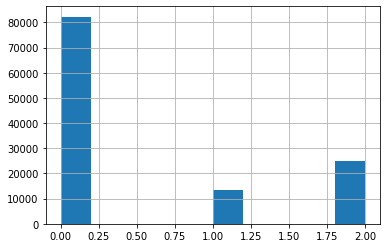

In [ ]:
df_analise['PERIODO'].hist(bins=10)
plt.show()

> Podemos perceber quando olhamos para a matrix de correlação que a feature <br> PERIODO não tem muito peso de relação com a variável target.

> Analisando o histograma também conseguimos identificar 3 categorias e que existe um desbalanceamento entre elas 

In [ ]:
df_analise.groupby('Tem_Nec')["porc_ACERT_lp"].describe().reset_index().sort_values(by=['mean'], ascending=False)

,Tem_Nec,count,mean,std,min,25%,50%,75%,max
0,0,118206.0,60.548635,21.547604,0.0,45.8,62.5,79.2,100.0
1,1,2390.0,40.495272,21.689583,0.0,25.0,33.3,54.2,100.0


In [ ]:
# Plotar 

> O que podemos observar dessa feature a primeiro momento é que ela está desbalanceada 

In [ ]:
df_analise.groupby('CODESC')["porc_ACERT_lp"].describe()

,count,mean,std,min,25%,50%,75%,max
CODESC,,,,,,,,
24,6.0,49.300000,19.973482,25.0,34.350,50.00,62.500,75.0
36,10.0,59.180000,22.199439,16.7,50.000,58.35,71.875,91.7
48,18.0,60.183333,23.315565,20.8,38.550,60.40,75.000,95.8
59,23.0,56.156522,20.410778,25.0,39.550,62.50,64.600,100.0
61,52.0,67.786538,19.857384,20.8,58.300,70.80,83.300,100.0
...,...,...,...,...,...,...,...,...
925949,2.0,81.250000,2.899138,79.2,80.225,81.25,82.275,83.3
926024,28.0,65.317857,14.959205,29.2,64.600,70.80,71.850,95.8
926036,22.0,38.072727,10.937275,20.8,29.200,39.60,48.950,54.2


In [ ]:
corr_matrix = df_analise[['porc_ACERT_lp', 'CODESC']].corr()
corr_matrix['porc_ACERT_lp'].sort_values(ascending=False)

porc_ACERT_lp    1.000000
CODESC          -0.009205
Name: porc_ACERT_lp, dtype: float64

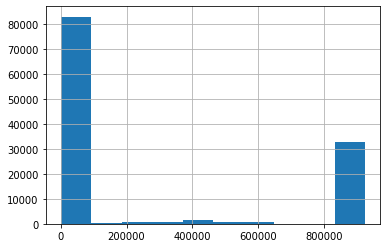

In [ ]:
df_analise['CODESC'].hist()

> A feature CODESC além do desbalanceamento seu correlacionamento é negativo e próximo 0, ou seja, <br>não seria muito útil utilizá--la em nosso modelo 

In [ ]:
df_analise.groupby('TP_SEXO')["porc_ACERT_lp"].describe()

,count,mean,std,min,25%,50%,75%,max
TP_SEXO,,,,,,,,
F,63088.0,62.353799,20.956677,0.0,45.8,62.5,79.2,100.0
M,57508.0,57.734910,22.300878,0.0,41.7,58.3,75.0,100.0


In [ ]:
#Transformando em uma variável quantitativa para validar a correlção com a variável target
df_analise['TP_SEXO'].replace(['F', 'M'], [0,1], inplace=True)

In [ ]:
#Criando a matrix de correlação 
corr_matrix = df_analise[['porc_ACERT_MAT','TP_SEXO' ]].corr()
corr_matrix['porc_ACERT_MAT'].sort_values(ascending=False)

porc_ACERT_MAT    1.000000
TP_SEXO           0.067498
Name: porc_ACERT_MAT, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

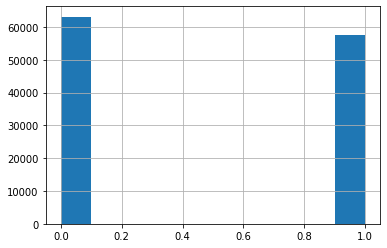

In [ ]:
df_analise['TP_SEXO'].hist()
plt.show

>  Apesar da média entre as variáveis categóricas implicarem que o gênero feminino<br> tem chances de irem melhor que o genêro masculino, quando olhamos a matrix de correlação <br>ela nos informa que, talvez ,essa informação não seja tão relevante para o modelo.

In [ ]:
#Analizando  a feature de turma que possui uma correlação negativa próxima de zero

In [ ]:
# Obter a quantidade de 'tipos' de turma 
amount = df_analise['TURMA'].drop_duplicates().count()

In [ ]:
# Criando um dataset para obter a correlação
df_turma = df[['TURMA', 'porc_ACERT_lp']]

In [ ]:
# Obtendo os labels 
type_t = []
for line in df['TURMA'].drop_duplicates():
    type_t.append(line)

In [ ]:
# Transformando a variável para variável quantitativa
df_turma.replace(type_t, range(amount), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
corr_matrix = df_turma.corr()
corr_matrix['porc_ACERT_lp'].sort_values(ascending=False)

porc_ACERT_lp    1.000000
TURMA           -0.011558
Name: porc_ACERT_lp, dtype: float64

> A feature TURMA possui uma correlação negativa com nossa target muito próxima de zero, o que nos leva a descartá-la, a primeiro momento do nosso treinamento

In [ ]:
df_analise["porc_ACERT_lp"].describe()

count    120596.000000
mean         60.151213
std          21.730825
min           0.000000
25%          41.700000
50%          62.500000
75%          79.200000
max         100.000000
Name: porc_ACERT_lp, dtype: float64

Utilizano o mesmo raciocinio com outras variáveis

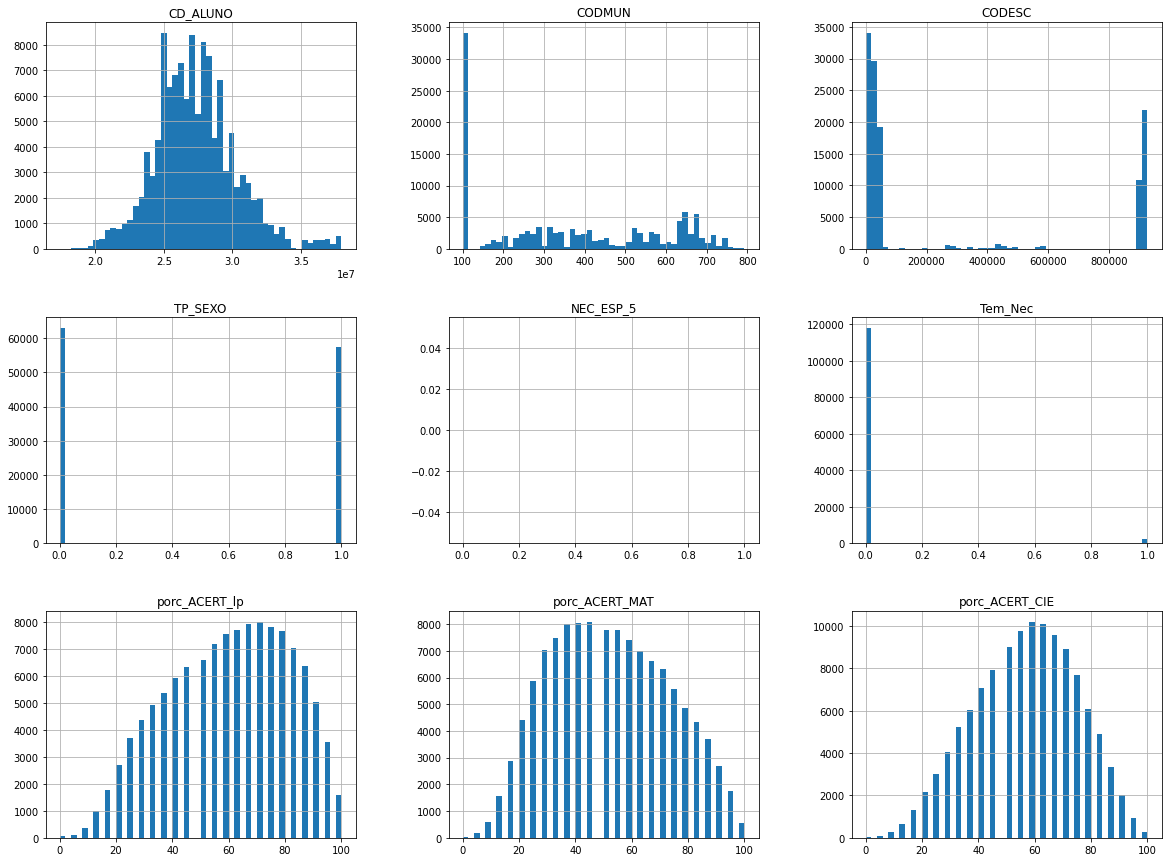

In [ ]:
df_analise.hist(bins=50, figsize=(20,15))
plt.show()

As variáveis mais correlacionadas a porc_ACERT_lp são: porc_ACERT_MAT, porc_ACERT_CIE

In [ ]:
# Criando um dataset para obter a correlação
df_corr= df[['porc_ACERT_MAT', 'porc_ACERT_lp', 'porc_ACERT_CIE']]

In [ ]:
corr_matrix = df_corr.corr()
corr_matrix['porc_ACERT_lp'].sort_values(ascending=False)

porc_ACERT_lp     1.000000
porc_ACERT_CIE    0.649702
porc_ACERT_MAT    0.629972
Name: porc_ACERT_lp, dtype: float64

> Temos variáveis nulas e variável sem nenhum valor, que iremos retirar, a primeiro momento do treinamento

#<h3> 3. Limpeza dos dados para inicio do treinamento#

> Bloco com recuo



In [ ]:
from datetime import datetime

def clean_data(df, drop=True):
  """
    Função para tratar e limpar os dados 
  """


  original_df = df.copy()

  delete_cols = ['NEC_ESP_4','NEC_ESP_5', 'CODMUN', 'CODESC', 'Tem_Nec', 
               'RegiaoMetropolitana', 'DE', 'CODMUN', 'MUN','Tipo_PROVA', 'CD_ALUNO',
               'SERIE_ANO','Q50','Q51','Q52','Q53','Q54', 'Q58','Q59', 'Q60', 
               'Q61', 'Q62', 'Q63', 'TURMA', 'NOMESC', 'PERIODO', 'NEC_ESP_3', 'NEC_ESP_2', 'NEC_ESP_1']

  original_df.drop(delete_cols, axis=1, inplace=True)
  original_df['TP_SEXO'].replace(['F', 'M'], [0,1], inplace=True)

  #Criamos uma nova feature chamada idade com base na coluna data de nascimento 
  original_df['IDADE'] = datetime.today().year - pd.DatetimeIndex(pd.to_datetime(original_df['DT_NASCIMENTO'], format="%m/%d/%Y")).year

  original_df.drop('DT_NASCIMENTO', axis=1, inplace=True)

  cols = original_df.select_dtypes('object').columns

  for i in range(len(cols)):
      original_df[cols[i]].replace(['A', 'B', 'C', 'D', 'E'], [0,1,2,3,4], inplace=True)

  return original_df

#<h3> 4. Modelos#

<h3> Modelo Gradient Decent

-----

In [ ]:
def gradient_descent(param, b, data, y, lr):

    """
      Retorna os parâmetros do modelo atualizado

      :parm param : list -> Parâmetros iniciais do modelo
      :parm b : float ->
    """
    
    #Quantidade de registros
    size = data.shape[0]
    
    #Quantidade de parâmetros
    n_parm = data.shape[1]
    
    m_grad = 0
    b_grad = 0
    updated_parameters = []

    for i in range(n_parm):
        for j in range(size):
            x = data[j][i]
            
            theta = param[i]
           
            #Derivada parcial do theta
            d_theta = -((2/size) * x * (y[j] - (theta * x + b)))
            
            #Derivada parcial do bias
            d_bias = - ((2/size) * (y[j] - (theta * x + b)))
       
            #Update gradient
            m_grad = m_grad + d_theta
            b_grad = b_grad + d_bias
        
        #Lista de parâmeros atualizados
        updated_parameters.append(theta - lr * m_grad)
        
        #Bias atualizado
        b_updated = b - lr * b_grad

    
    return updated_parameters, b_updated

In [ ]:
def cost_function(theta, bias, X, y, pred):
    """
      Realiza a operação da função quadrática
    """
    size = len(X)
    return (1/2*size) * np.sum(np.square(pred-y))

In [ ]:
def calc_error(m, b, data, y):
    """
      Calcula o erro gerado pelo modelo
    """
    total_error=0.0
    
    for i in range(data.shape[1]):
        for j in range(data.shape[0]):
            prev = m[i] * data[j,i] + b
        
            error = cost_function(m[i], b, data, y[j], prev)
            total_error += error
    return total_error

In [ ]:
def prevision(feature, parameters , b):
    """
      Prevê qual será a saída do modelo 
      :parm feature : arrayNumpy -> Dados de entrada para o modelo (var explanatórias)
      :parm parameters: list -> Lista dos parâmetros do modelo 
      :parm b: float Parâmetro do modelo
    """
    prev = 0
    targets = []
    for i in range(feature.shape[1]):
        for j in range(feature.shape[0]):
            prev += feature[j][i] * parameters[i]
        prev += b
    targets.append(prev)
    
    return targets

In [ ]:
def r2_evaluation(pred, real):
  """
    Função para avaliação do modelo utilizando a métrica R2
  """
  sse = sum(np.power(np.subtract(real, pred),2))
  tse = (len(real) - 1) * np.var(real, ddof=1)

  r2_score = 1 - np.divide(sse , tse)
  
  return r2_score

In [ ]:
def mse_evaluation(pred, target):
    """
      Função para avaliação do modelo utilizando a métrica mean square error
    """
    error=abs(pred-target)
    total_error = np.dot(error,error)

    return np.sqrt(total_error/len(error))
  

In [ ]:
def split_data(df):
  """
    Separar o modelo em treino e validação
  """
  return  df.sample(frac=1, random_state=1).reset_index(drop=True)

In [ ]:
def print_best_model(params, bias):

  function = ""

  for i in range(len(params)):
      function += f'{params[i]:.2f} * x{i} + '

  return function + str(bias)

<h5> Realizando o treinamento do modelo utilizando o Gradient Decent

In [ ]:
from sklearn.model_selection import train_test_split

df_aux = clean_data(df)
df_aux.drop(['nivel_profic_lp', 'nivel_profic_mat', 'nivel_profic_cie'], axis=1, inplace=True)

feature_lp = df_aux.drop(['porc_ACERT_lp'], axis=1 )
feature_mat = df_aux.drop(['porc_ACERT_MAT'], axis=1 )
feature_cie = df_aux.drop(['porc_ACERT_CIE'], axis=1 )

y_lp = df_aux['porc_ACERT_lp']
y_mat = df_aux['porc_ACERT_MAT']
y_cie = df_aux['porc_ACERT_CIE']

X_train_lp, X_test_lp, y_train_lp, y_test_lp = train_test_split(feature_lp, y_lp, test_size=0.2)
X_train_mat, X_test_mat, y_train_mat, y_test_mat = train_test_split(feature_mat, y_mat, test_size=0.2)
X_train_cie, X_test_cie, y_train_cie, y_test_cie = train_test_split(feature_cie, y_cie, test_size=0.2)

MODELO PARA PREVISÃO DE LINGUA PORTUGUESA

In [ ]:
import numpy as np
import random

np_X_train_lp = np.array(X_train_lp)
np_y_train_lp = np.array(y_train_lp)

#Inicialização randômica dos parâmetros da função
parameters = []
parameters = [random.random() for i in range(np_X_train_lp.shape[1])]

#Inicialização do parâmetro bias
bias = 0

#Hiperparametros
epochs = 50
lr = 0.01

#Treinamento para encontrar o melhor modelo para LP
for i in range(epochs):
    
    #Ajustando os parâmetros
    parameters, bias = gradient_descent(parameters, bias, np_X_train_lp, np_y_train_lp, lr)

    #Calculando o erro por iteração
    loss = calc_error(parameters, bias, np_X_train_lp, np_y_train_lp)

print(f'Melhor modelo: {print_best_model(parameters, bias)}\nFunção custo: {loss}' )

Melhor modelo: -29696956099925530412531717480305064400160529372643159136491349357641670034466300477046784.00 * x0 + -147677380931073607419077541508649203234559905287196206516221838032782825782121407377833984.00 * x1 + -267941278819850457495797355797736686044678181804688004752315200521889976753067475618234368.00 * x2 + -376031776752618920886871760555675771297098315326372761292226805482334048507585647402287104.00 * x3 + -487999451535857125487860606326860806744738315433252032972606427390754337067042314355998720.00 * x4 + -594416164533921356939287031460449369028546702641183039180583431038763113936629650295881728.00 * x5 + -707758890581953612373957121489051843277884075750773218191622419918153248609656276359577600.00 * x6 + -803456748245851335310150642545737949644819084802143933581144959553093868678939886116405248.00 * x7 + -820216258480621732461311662223303937620846917144550945244328084493199434655971149638270976.00 * x8 + -8250436192074940644519470343664119437394159794104303332537415229897

MODELO PARA PREVISÃO DE MATEMÁTICA

In [ ]:
import numpy as np
import random

np_X_train_mat = np.array(X_train_mat)
np_y_train_mat = np.array(y_train_mat)

#Inicialização randômica dos parâmetros da função
parameters_mat = []
parameters_mat = [random.random() for i in range(np_X_train_mat.shape[1])]

#Inicialização do parâmetro bias
bias_mat = 0

#Hiperparametros
epochs = 10
lr = 0.01


#Treinamento para encontrar o melhor modelo para MAT
for i in range(epochs):
    
    #Ajustando os parâmetros
    parameters_mat, bias_mat = gradient_descent(parameters_mat, bias_mat, np_X_train_mat, np_y_train_mat, lr)

    #Calculando o erro por iteração
    loss = calc_error(parameters_mat, bias_mat, np_X_train_mat, np_y_train_mat)

print(f'Melhor modelo: {print_best_model(parameters_mat, bias_mat)}\nPerda: {loss}' )

Melhor modelo: -280598840220499.88 * x0 + -1395178540986285.75 * x1 + -2531258973221396.00 * x2 + -3552059414513786.00 * x3 + -4607876023085633.00 * x4 + -5610954796726910.00 * x5 + -6678798424962608.00 * x6 + -7580154688256440.00 * x7 + -7738166812813997.00 * x8 + -7783605881460763.00 * x9 + -7994275731561360.00 * x10 + -8073038840010085.00 * x11 + -8391245300910570.00 * x12 + -8467113391036266.00 * x13 + -8695980555918457.00 * x14 + -9080966524878598.00 * x15 + -9241872102626344.00 * x16 + -9504143102489050.00 * x17 + -9611220814192302.00 * x18 + -9824719115585030.00 * x19 + -9937407944865690.00 * x20 + -10063769044794920.00 * x21 + -10289350952408714.00 * x22 + -10361839377921940.00 * x23 + -10566010105241010.00 * x24 + -11154327053974106.00 * x25 + -11692693583005354.00 * x26 + -12015611059990814.00 * x27 + -12473303622804018.00 * x28 + -12776130163943550.00 * x29 + -13274616715854526.00 * x30 + -13698852613894164.00 * x31 + -14145097813152676.00 * x32 + -14403500007299570.00 * x33

MODELO PARA PREVISÃO DE CIÊNCIAS

In [ ]:
import numpy as np
import random

np_X_train_cie = np.array(X_train_cie)
np_y_train_cie = np.array(y_train_cie)

#Inicialização randômica dos parâmetros da função
parameters_cie = []
parameters_cie = [random.random() for i in range(np_X_train_cie.shape[1])]

#Inicialização do parâmetro bias
bias_cie = 0

#Hiperparametros
epochs = 10
lr = 0.01


#Treinamento para encontrar o melhor modelo para CIE
for i in range(epochs):
    
    #Ajustando os parâmetros
    parameters_cie, bias_cie = gradient_descent(parameters_cie, bias_cie, np_X_train_cie, np_y_train_cie, lr)

    #Calculando o erro por iteração
    loss = calc_error(parameters_cie, bias, np_X_train_cie, np_y_train_cie)

print(f'Melhor modelo: {print_best_model(parameters_cie, bias_cie)}\nPerda: {loss}' )

Melhor modelo: -240748620760353.84 * x0 + -1199702529489624.50 * x1 + -2176699837677367.50 * x2 + -3055340796759224.50 * x3 + -3962988690050718.00 * x4 + -4825600236049319.00 * x5 + -5744230801981069.00 * x6 + -6519617776649317.00 * x7 + -6655608135269150.00 * x8 + -6694676941093642.00 * x9 + -6876234160831529.00 * x10 + -6943651365316770.00 * x11 + -7217306857948155.00 * x12 + -7282209789834711.00 * x13 + -7478724907461234.00 * x14 + -7809530701617447.00 * x15 + -7948237928706493.00 * x16 + -8173719701209791.00 * x17 + -8266274951461664.00 * x18 + -8449603015355992.00 * x19 + -8546509027985407.00 * x20 + -8654901378005333.00 * x21 + -8849365999562471.00 * x22 + -8911721393698814.00 * x23 + -9088230108295836.00 * x24 + -9594393288282890.00 * x25 + -10057142593255594.00 * x26 + -10334512114329266.00 * x27 + -10727827154849440.00 * x28 + -10988535333479434.00 * x29 + -11417093133124952.00 * x30 + -11781446576929574.00 * x31 + -12165926296958974.00 * x32 + -12388131882342006.00 * x33 + -1

<h5> Realizando a predição dos modelos

In [ ]:
np_X_test_lp = np.array(X_test_lp)
np_y_test_lp = np.array(y_test_lp)
np_X_test_mat = np.array(X_test_mat)
np_y_test_mat = np.array(y_test_mat)
np_X_test_cie = np.array(X_test_cie)
np_y_test_cie = np.array(y_test_cie)

In [ ]:
lp_pred = prevision(np_X_test_lp, parameters, bias)
lp_pred

[-7.219699662264868e+25]

In [ ]:
mat_pred = prevision(np_X_test_mat, parameters_mat, bias_mat)
mat_pred

[-1.534080898696528e+26]

In [ ]:
cie_pred = prevision(np_X_test_cie, parameters_cie, bias_cie)
cie_pred

[-1.2564909260829912e+26]

<h5> Realizando a Avaliação do modelo 

In [ ]:
print(f' Modelo LP (r2):  {r2_evaluation(mat_pred, np_y_test_lp)}')
print(f' Modelo MAT (r2): {r2_evaluation(mat_pred, y_test_mat)}')
print(f' Modelo CIE (r2): {r2_evaluation(cie_pred, y_test_cie)}')

 Modelo LP (r2):  -5.037614092962512e+49
 Modelo MAT (r2): -5.17759875763258e+49
 Modelo CIE (r2): -4.666245004213234e+49


In [ ]:
f' Modelo LP (mse): {mse_evaluation(lp_pred, y_test_lp)}'

In [ ]:
f' Modelo MAT (mse): {mse_evaluation(mat_pred, y_test_mat)}'

In [ ]:
f' Modelo CIE (mse): {mse_evaluation(cie_pred, y_test_cie)}'

<h3> Modelo Regressão Linear - Implementada sem uso de sklearn model

---

In [ ]:
from sklearn.model_selection import train_test_split

df_aux = clean_data(df)
df_aux.drop(['nivel_profic_lp', 'nivel_profic_mat', 'nivel_profic_cie'], axis=1, inplace=True)

feature_lp = df_aux.drop(['porc_ACERT_lp'], axis=1 )
feature_mat = df_aux.drop(['porc_ACERT_MAT'], axis=1 )
feature_cie = df_aux.drop(['porc_ACERT_CIE'], axis=1 )

y_lp = df_aux['porc_ACERT_lp']
y_mat = df_aux['porc_ACERT_MAT']
y_cie = df_aux['porc_ACERT_CIE']

X_train_lp, X_test_lp, y_train_lp, y_test_lp = train_test_split(feature_lp, y_lp, test_size=0.2)
X_train_mat, X_test_mat, y_train_mat, y_test_mat = train_test_split(feature_mat, y_mat, test_size=0.2)
X_train_cie, X_test_cie, y_train_cie, y_test_cie = train_test_split(feature_cie, y_cie, test_size=0.2)

<h5> 2. Criando o modelo de regressão

In [ ]:
from sklearn.linear_model import LinearRegression

model_lp  = LinearRegression()
model_mat = LinearRegression()
model_cie = LinearRegression()


#Realizando treinamento
model_lp.fit(X_train_lp, y_train_lp)
model_mat.fit(X_train_mat, y_train_mat)
model_cie.fit(X_train_cie, y_train_cie)

LinearRegression()

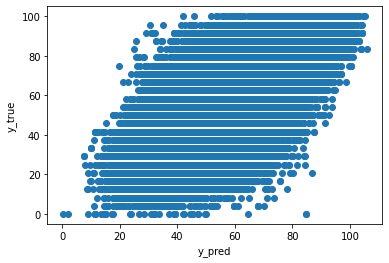

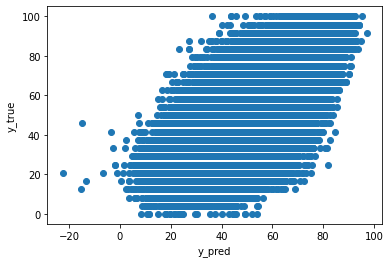

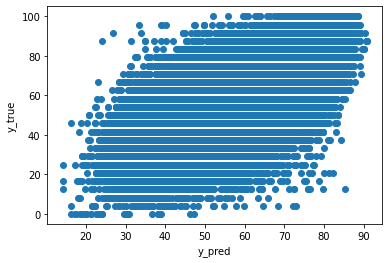

In [ ]:
plt.scatter(model_lp.predict(X_train_lp), y_train_lp)
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.show()

plt.scatter(model_mat.predict(X_train_mat), y_train_mat)
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.show()

plt.scatter(model_cie.predict(X_train_cie), y_train_cie)
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.show()

<h5> 3. Fazendo as previsões

In [ ]:
y_pred_lp = model_lp.predict(X_test_lp)
y_pred_mat = model_mat.predict(X_test_mat)
y_pred_cie = model_cie.predict(X_test_cie)

<h5> 4. Realizando a avalização do modelo

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

In [ ]:
print(' Modelo LP (r2): ', r2_score(y_test_lp, y_pred_lp))
print(' Modelo MAT (r2): ', r2_score(y_test_mat, y_pred_mat))
print(' Modelo CIE (r2): ', r2_score(y_test_cie, y_pred_cie))

 Modelo LP (r2):  0.558955322493184
 Modelo MAT (r2):  0.5493492381228227
 Modelo CIE (r2):  0.5097094019661196


In [ ]:
print(' Modelo LP (mse): ', mean_absolute_error(y_test_lp, y_pred_lp))
print(' Modelo MAT (mse): ', mean_absolute_error(y_test_mat, y_pred_mat))
print(' Modelo CIE (mse): ', mean_absolute_error(y_test_cie, y_pred_cie))

 Modelo LP (mse):  11.400077335111424
 Modelo MAT (mse):  11.445365424146193
 Modelo CIE (mse):  10.352235444978861



> What are the conclusions? (1-2 paragraphs)

No modelo de regressão linear simples, utilizando o sklearn, o nosso r2 ficou em torno de 50%, ou seja, as nossas variáveis explicativas estão explicando aproximadamente 50% da variável resposta. Isso pode indicar que nosso problema não é tão simple e não pode ser resolvido apenas como uma reta.





#*Questão 2*#


2. (1 point) Use different Gradient Descent (GD) learning rates when optimizing. Compare the GD-based solutions with Normal Equation. What are the conclusions?


**Regressão Linear com SGD Regressor**

In [ ]:
from sklearn.model_selection import train_test_split

df_aux = clean_data(df)
df_aux.drop(['nivel_profic_lp', 'nivel_profic_mat', 'nivel_profic_cie'], axis=1, inplace=True)

feature_lp = df_aux.drop(['porc_ACERT_lp'], axis=1 )
feature_mat = df_aux.drop(['porc_ACERT_MAT'], axis=1 )
feature_cie = df_aux.drop(['porc_ACERT_CIE'], axis=1 )

y_lp = df_aux['porc_ACERT_lp']
y_mat = df_aux['porc_ACERT_MAT']
y_cie = df_aux['porc_ACERT_CIE']

X_train_lp, X_test_lp, y_train_lp, y_test_lp = train_test_split(feature_lp, y_lp, test_size=0.2)
X_train_mat, X_test_mat, y_train_mat, y_test_mat = train_test_split(feature_mat, y_mat, test_size=0.2)
X_train_cie, X_test_cie, y_train_cie, y_test_cie = train_test_split(feature_cie, y_cie, test_size=0.2)

In [ ]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from random import random
import matplotlib.pyplot as plt
import itertools


sgdreg_lp = SGDRegressor(max_iter=300, eta0=0.00001, power_t=0.15,penalty = 'l2')
sgdreg_lp.fit(X_train_lp, y_train_lp)
y_pred_lp = sgdreg_lp.predict(X_test_lp)

sgdreg_mat = SGDRegressor(max_iter=300, eta0=0.00001, power_t=0.15, penalty = 'l2')
sgdreg_mat.fit(X_train_mat, y_train_mat)
y_pred_mat = sgdreg_mat.predict(X_test_mat)

sgdreg_cie = SGDRegressor(max_iter=300, eta0=0.00001, power_t=0.15, penalty = 'l2')
sgdreg_cie.fit(X_train_cie, y_train_cie)
y_pred_cie = sgdreg_cie.predict(X_test_cie)


In [ ]:
y_cie = (((y_test_cie - y_pred_cie)**2).sum())

In [ ]:
y_cie

4084240.7455267943

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error
print(' Modelo LP (r2): ', r2_score(y_test_lp, y_pred_lp))
print(' Modelo MAT (r2): ', r2_score(y_test_mat, y_pred_mat))
print(' Modelo CIE (r2): ', r2_score(y_test_cie, y_pred_cie))

print(' Modelo LP (mse): ', mean_absolute_error(y_test_lp, y_pred_lp))
print(' Modelo MAT (mse): ', mean_absolute_error(y_test_mat, y_pred_mat))
print(' Modelo CIE (mse): ', mean_absolute_error(y_test_cie, y_pred_cie))

 Modelo LP (r2):  0.5544474098351846
 Modelo MAT (r2):  0.5346492178724527
 Modelo CIE (r2):  0.498815561742991
 Modelo LP (mse):  11.473299127996096
 Modelo MAT (mse):  11.571970075376939
 Modelo CIE (mse):  10.400202412840846


"""COMENTAR"""


#*Questão 3*#


**Criando modelo polinomial**


3. (0.75 point) Sometimes, we need some more complex function to make good prediction. Devise and evaluate a Polynomial Linear Regression model. 


In [ ]:
# TODO: Complex model. You can use scikit-learn libraries.
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [ ]:
#Modelo
poly = PolynomialFeatures(degree=2,include_bias=False)
X_train_poly_lp = poly.fit_transform(X_train_lp)
X_train_poly_mat = poly.fit_transform(X_train_mat)
X_train_poly_cie = poly.fit_transform(X_train_cie)

In [ ]:
#Criando o modelo Linear
clf_lp = linear_model.LinearRegression()
clf_mat = linear_model.LinearRegression()
clf_cie = linear_model.LinearRegression()

In [ ]:
#Treinando o modelo linear com a saida do treinamento do modelo polinomial 
clf_lp.fit(X_train_poly_lp, y_train_lp)
clf_mat.fit(X_train_poly_mat, y_train_mat)
clf_cie.fit(X_train_poly_cie, y_train_cie)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score
test_x_poly_lp = poly.fit_transform(X_test_lp)
test_y_lp = clf_lp.predict(test_x_poly_lp)

test_x_poly_mat = poly.fit_transform(X_test_mat)
test_y_mat = clf_mat.predict(test_x_poly_mat)

test_x_poly_cie = poly.fit_transform(X_test_cie)
test_y_cie = clf_cie.predict(test_x_poly_cie)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
print("R2-score de validação lp: %.2f" % r2_score(y_test_lp, test_y_lp))
print("mean_squared_absolute_error de validação lp: %.2f" % mean_absolute_error(y_test_lp, test_y_lp))

print("R2-score de validação lp: %.2f" % r2_score(y_test_mat, test_y_mat))
print("mean_squared_absolute_error de validação lp: %.2f" % mean_absolute_error(y_test_mat, test_y_mat))

print("R2-score de validação lp: %.2f" % r2_score(y_test_cie, test_y_cie))
print("mean_squared_absolute_error de validação lp: %.2f" % mean_absolute_error(y_test_cie, test_y_cie))


R2-score de validação lp: 0.57
mean_squared_absolute_error de validação lp: 11.24
R2-score de validação lp: 0.57
mean_squared_absolute_error de validação lp: 11.08
R2-score de validação lp: 0.54
mean_squared_absolute_error de validação lp: 9.89


*texto em itálico*
 > What are the conclusions? What are the actions after such analyses? (1-2 paragraphs)

 


Tentamos executar um modelo mais complexo com 2 graus e tivemos uma melhora pequena no R2. Ao elevar o grau do polinomio para 3 a GPU não conseguiu executar, sendo assim, procuramos informações a respeito e entendemos que  para graus maiores é recomendável executar um PCA para reduzir a dimensionalidade. Outra solução seria executar uma árvore de decisão para encontrar a participação das variáveis e ajudar a reduzir a quantia de features do nosso modelo

4. (0.5) Plot the cost function vs. number of epochs in the training/validation set and analyze the model. 

In [ ]:
# TODO: Plot the cost function vs. number of iterations in the training set.

In [ ]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from random import random
import matplotlib.pyplot as plt
import itertools

a_lp = []
b_lp = []
a_mat = []
b_mat = []
a_cie = []
b_cie = []

for iteration in [5, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]:
  sgdreg_lp = SGDRegressor(max_iter=iteration, eta0=0.00001, power_t=0.15)
  sgdreg_lp.fit(X_train_lp, y_train_lp)
  y_pred_lp = sgdreg_lp.predict(X_test_lp)
  x_lp = iteration
  y_lp = mean_absolute_error(y_test_lp, y_pred_lp)
  a_lp.append(y_lp)
  b_lp.append(x_lp)

  sgdreg_mat = SGDRegressor(max_iter=iteration, eta0=0.00001, power_t=0.15)
  sgdreg_mat.fit(X_train_mat, y_train_mat)
  y_pred_mat = sgdreg_mat.predict(X_test_mat)
  x_mat = iteration
  y_mat = mean_absolute_error(y_test_mat, y_pred_mat)
  a_mat.append(y_mat)
  b_mat.append(x_mat)

  sgdreg_cie = SGDRegressor(max_iter=iteration, eta0=0.00001, power_t=0.15)
  sgdreg_cie.fit(X_train_cie, y_train_cie)
  y_pred_cie = sgdreg_cie.predict(X_test_cie)
  x_cie = iteration
  y_cie = mean_absolute_error(y_test_cie, y_pred_cie)
  a_cie.append(y_cie)
  b_cie.append(x_cie)
  
  print(iteration)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


5


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


100
200
300
400
500
600
700
800
900
1000


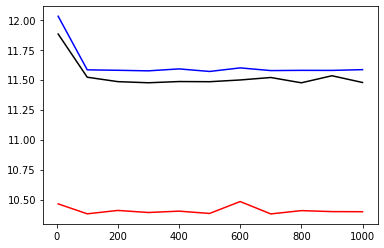

In [ ]:
##Vamos utilizar a saida do SGD regressor para calcular a função de custo
import matplotlib.pyplot as plt
import numpy as np

plt.plot(b_lp, a_lp, color='black');
plt.plot(b_mat, a_mat, color='blue');
plt.plot(b_cie, a_cie, color='red');


*texto em itálico*
 > What are the conclusions? What are the actions after such analyses? (1-2 paragraphs)

O erro começa a cair a partir de 100 interações e apartir de entao converge para o erro que estamos encontrando na equação normal. Mesmo aumentando mais as interações o erro não diminui mais, oque nos leva a pensar que o modelo linear é o ideal

5. (0.25 point) Pick **your best model**, based on your validation set, and predict the target values for the test set.

In [ ]:
##Nosso melhor modelo foi o modelo ponimial com Grau 2, vamos executá-lo no nosso dataframe de test:

In [ ]:
teste=pd.read_csv("/content/drive/MyDrive/2.trabalho-pos-2/code/test.csv")

In [ ]:
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 87 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CD_ALUNO             1000 non-null   int64  
 1   NOMESC               1000 non-null   object 
 2   Q1                   1000 non-null   object 
 3   Q2                   1000 non-null   object 
 4   Q3                   1000 non-null   object 
 5   Q4                   1000 non-null   object 
 6   Q5                   1000 non-null   object 
 7   Q6                   1000 non-null   object 
 8   Q7                   1000 non-null   object 
 9   Q8                   1000 non-null   object 
 10  Q9                   1000 non-null   object 
 11  Q10                  1000 non-null   object 
 12  Q11                  1000 non-null   object 
 13  Q12                  1000 non-null   object 
 14  Q13                  1000 non-null   object 
 15  Q14                  1000 non-null   ob

In [ ]:
teste_aux = clean_data(teste)
target_lp = teste_aux['porc_ACERT_lp']
target_mat = teste_aux['porc_ACERT_MAT']
target_cie = teste_aux['porc_ACERT_CIE']

feature_target_lp = teste_aux.drop(['porc_ACERT_lp', 'nivel_profic_cie','nivel_profic_mat'], axis = 1)
feature_target_mat = teste_aux.drop(['porc_ACERT_MAT', 'nivel_profic_cie','nivel_profic_mat'], axis = 1)
feature_target_cie = teste_aux.drop(['porc_ACERT_CIE', 'nivel_profic_cie','nivel_profic_mat'], axis = 1)

In [ ]:
test_x_poly_lp = poly.fit_transform(feature_target_lp)
test_y_lp = clf_lp.predict(test_x_poly_lp)

test_x_poly_mat = poly.fit_transform(feature_target_mat)
test_y_mat = clf_mat.predict(test_x_poly_mat)

test_x_poly_cie = poly.fit_transform(feature_target_cie)
test_y_cie = clf_cie.predict(test_x_poly_cie)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
print("R2-score de validação lp: %.2f" % r2_score(target_lp, test_y_lp))
print("mean_squared_absolute_error de validação lp: %.2f" % mean_absolute_error(target_lp, test_y_lp))

print("R2-score de validação mat: %.2f" % r2_score(target_mat, test_y_mat))
print("mean_squared_absolute_error de validação mat: %.2f" % mean_absolute_error(target_mat, test_y_mat))

print("R2-score de validação cie: %.2f" % r2_score(target_cie, test_y_cie))
print("mean_squared_absolute_error de validação cie: %.2f" % mean_absolute_error(target_cie, test_y_cie))

R2-score de validação lp: 0.62
mean_squared_absolute_error de validação lp: 10.95
R2-score de validação mat: 0.61
mean_squared_absolute_error de validação mat: 10.84
R2-score de validação cie: 0.58
mean_squared_absolute_error de validação cie: 9.49


## Logistic Regression

Now, this part of the assignment aims to predict students' proeficiency level on Portuguese, Mathematics, and Natural Sciences (target values: `nivel_profic_lp`, `nivel_profic_mat` and `nivel_profic_cie`) based on their socioeconomic data. Then, you have to **drop the columns `porc_ACERT_lp`,  `porc_ACERT_MAT`** and  **`porc_ACERT_CIE`**.

In [ ]:
#TODO: Load and preprocess your dataset.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date
from sklearn import preprocessing
%matplotlib inline

df_aux = clean_data(df)
df_aux.drop(['porc_ACERT_lp','porc_ACERT_MAT', 'porc_ACERT_CIE'], axis = 1,inplace=True)

In [ ]:
##Processing
aux = df_aux.select_dtypes('object')
encoded = preprocessing.LabelEncoder()
aux = aux.apply(encoded.fit_transform)
df_aux = pd.concat([df_aux.select_dtypes(['float64', 'int64']), aux], axis=1)

In [ ]:
df_aux.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q48,Q49,Q55,Q56,Q57,TP_SEXO,IDADE,nivel_profic_lp,nivel_profic_mat,nivel_profic_cie
0,1,4,4,4,4,4,4,4,1,0,...,2,2,1,0,3,0,19,0,0,0
1,1,3,4,2,4,4,4,4,0,0,...,1,2,0,0,2,1,12,1,2,1
2,1,4,1,3,4,1,3,2,0,0,...,1,2,1,0,4,0,16,3,3,3
3,1,3,4,3,2,4,3,3,0,0,...,2,2,0,0,4,1,19,0,0,0
4,1,3,4,4,4,4,4,2,0,0,...,1,1,1,0,4,0,15,1,0,3


### Activities

1. (2.75 points) Perform Multinomial Logistic Regression (_i.e._, softmax regression). It is a generalization of Logistic Regression to the case where we want to handle multiple classes. Try different combinations of features, dropping the ones less correlated to the target variables.

In [ ]:
# TODO: Multinomial Logistic Regression. You can use scikit-learn libraries.

Avaliando se as classes que iremos predizer precisam ser balanceadas.

Notamos que as classes estão desbalanceadas

In [ ]:
print(df["nivel_profic_lp"].value_counts(normalize=True))
print(df["nivel_profic_mat"].value_counts(normalize=True))
print(df["nivel_profic_cie"].value_counts(normalize=True))

Básico              0.453456
Adequado            0.264876
Abaixo do Básico    0.227255
Avançado            0.054413
Name: nivel_profic_lp, dtype: float64
Básico              0.450214
Abaixo do Básico    0.372243
Adequado            0.142061
Avançado            0.035482
Name: nivel_profic_mat, dtype: float64
Básico              0.441399
Abaixo do Básico    0.296511
Adequado            0.206657
Avançado            0.055433
Name: nivel_profic_cie, dtype: float64


In [ ]:
##Divisão da base em treino e validação
from sklearn.model_selection import train_test_split

feature_lp = df_aux.drop(['nivel_profic_lp'], axis=1 )
feature_mat = df_aux.drop(['nivel_profic_mat','nivel_profic_lp'], axis=1 )
feature_cie = df_aux.drop(['nivel_profic_cie','nivel_profic_lp'], axis=1 )

y_lp = df_aux['nivel_profic_lp']
y_mat = df_aux['nivel_profic_mat']
y_cie = df_aux['nivel_profic_cie']


X_train_lp, X_test_lp, y_train_lp, y_test_lp = train_test_split(feature_lp, y_lp, test_size=0.2, random_state=30)
X_train_mat, X_test_mat, y_train_mat, y_test_mat = train_test_split(feature_mat, y_mat, test_size=0.2, random_state=30)
X_train_cie, X_test_cie, y_train_cie, y_test_cie = train_test_split(feature_cie, y_cie, test_size=0.2, random_state=30)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,plot_confusion_matrix
from sklearn.preprocessing import MinMaxScaler

model_lp = LogisticRegression(penalty ='l2', class_weight='balanced', max_iter = 10000)
model_lp.fit(X_train_lp, y_train_lp)
predicted_lp = model_lp.predict(X_test_lp)

model_mat = LogisticRegression(penalty ='l2', class_weight='balanced', max_iter = 1000)
model_mat.fit(X_train_mat, y_train_mat)
predicted_mat = model_mat.predict(X_test_mat)

model_cie = LogisticRegression(penalty ='l2', class_weight='balanced', max_iter = 500)
model_cie.fit(X_train_cie, y_train_cie)
predicted_cie = model_cie.predict(X_test_cie)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
target_names = ['Abaixo do Básico', 'Básico', 'Adequado', 'Avançado']
print(classification_report(y_test_lp, predicted_lp, target_names=target_names))
print(classification_report(y_test_mat, predicted_mat, target_names=target_names))
print(classification_report(y_test_cie, predicted_cie, target_names=target_names))

                  precision    recall  f1-score   support

Abaixo do Básico       0.54      0.69      0.61      5486
          Básico       0.41      0.39      0.40      6431
        Adequado       0.20      0.69      0.31      1305
        Avançado       0.61      0.36      0.45     10898

        accuracy                           0.46     24120
       macro avg       0.44      0.54      0.44     24120
    weighted avg       0.52      0.46      0.47     24120

                  precision    recall  f1-score   support

Abaixo do Básico       0.64      0.62      0.63      9029
          Básico       0.28      0.28      0.28      3369
        Adequado       0.14      0.63      0.23       852
        Avançado       0.62      0.47      0.53     10870

        accuracy                           0.50     24120
       macro avg       0.42      0.50      0.42     24120
    weighted avg       0.56      0.50      0.52     24120

                  precision    recall  f1-score   support

Abaixo 

In [ ]:
y_test_lp.shape[0]

24120

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMa

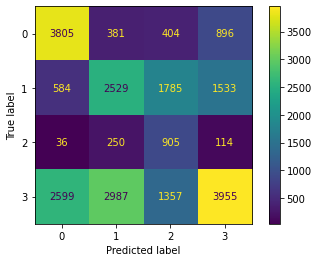

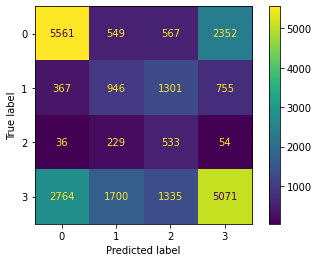

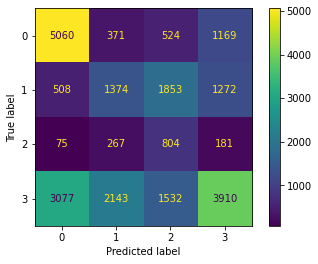

In [ ]:
plot_confusion_matrix(model_lp, X_test_lp, y_test_lp)
plot_confusion_matrix(model_mat, X_test_mat, y_test_mat)
plot_confusion_matrix(model_cie, X_test_cie, y_test_cie)

> What are the conclusions? (1-2 paragraphs)

> Todas as previsões teve um nível de acurácia insatisfatória, <br>seja para previsão do nívelo de português, matemática ou ciências.<br>Um padrão que pode ser notado é o fator do nível adequado ter<br>
baixa precisão em todos os modelos. Isso poderia ser um indício de 
má distribuição de dados. Ou o modelo pode estar fazendo previsões muito aleatórias.

**Língua Portuguesa**

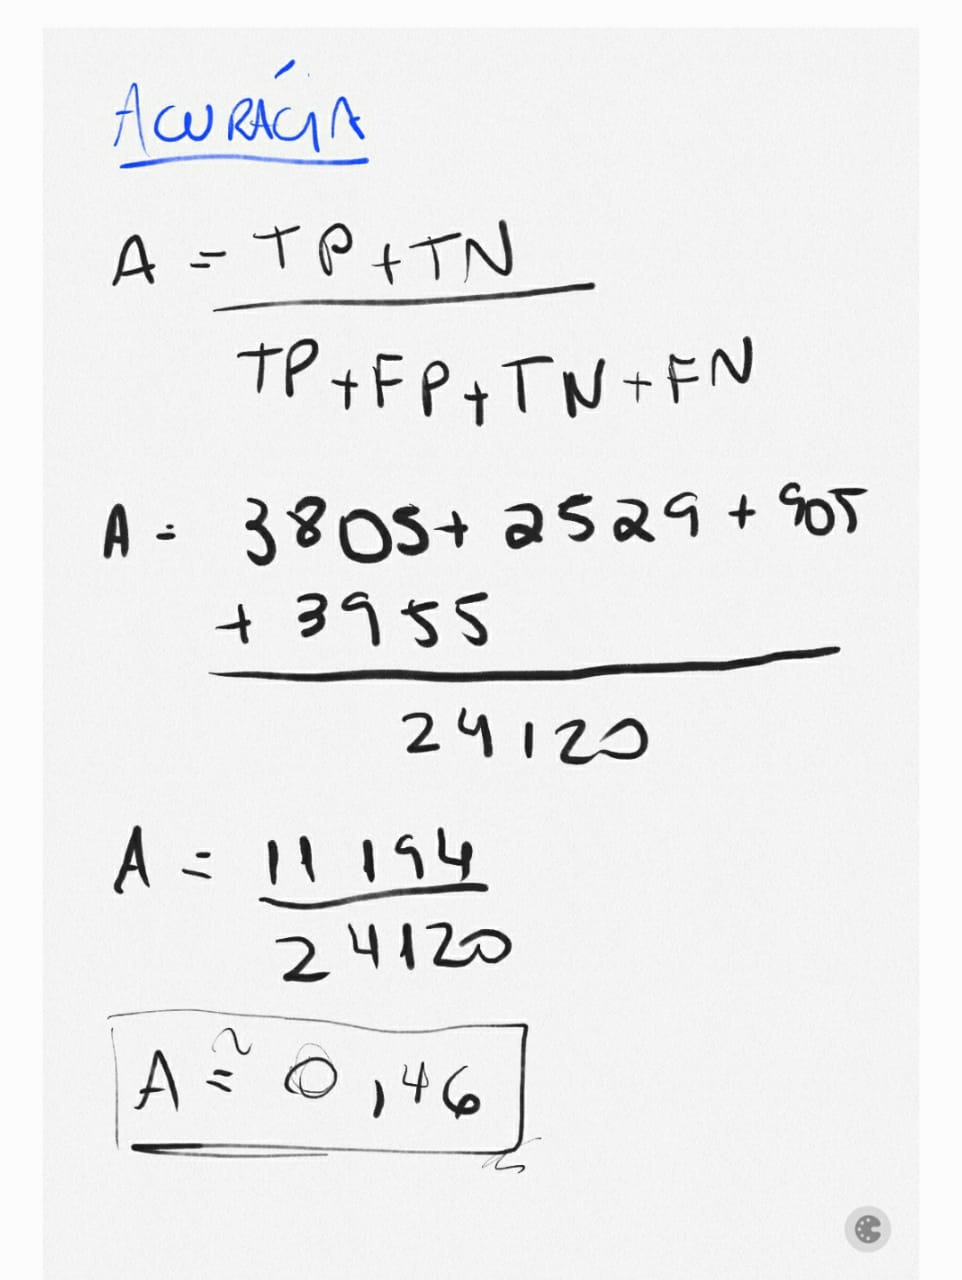

> ***Accuracy:*** aproximadamente 46% de acerto 


**Matemática**

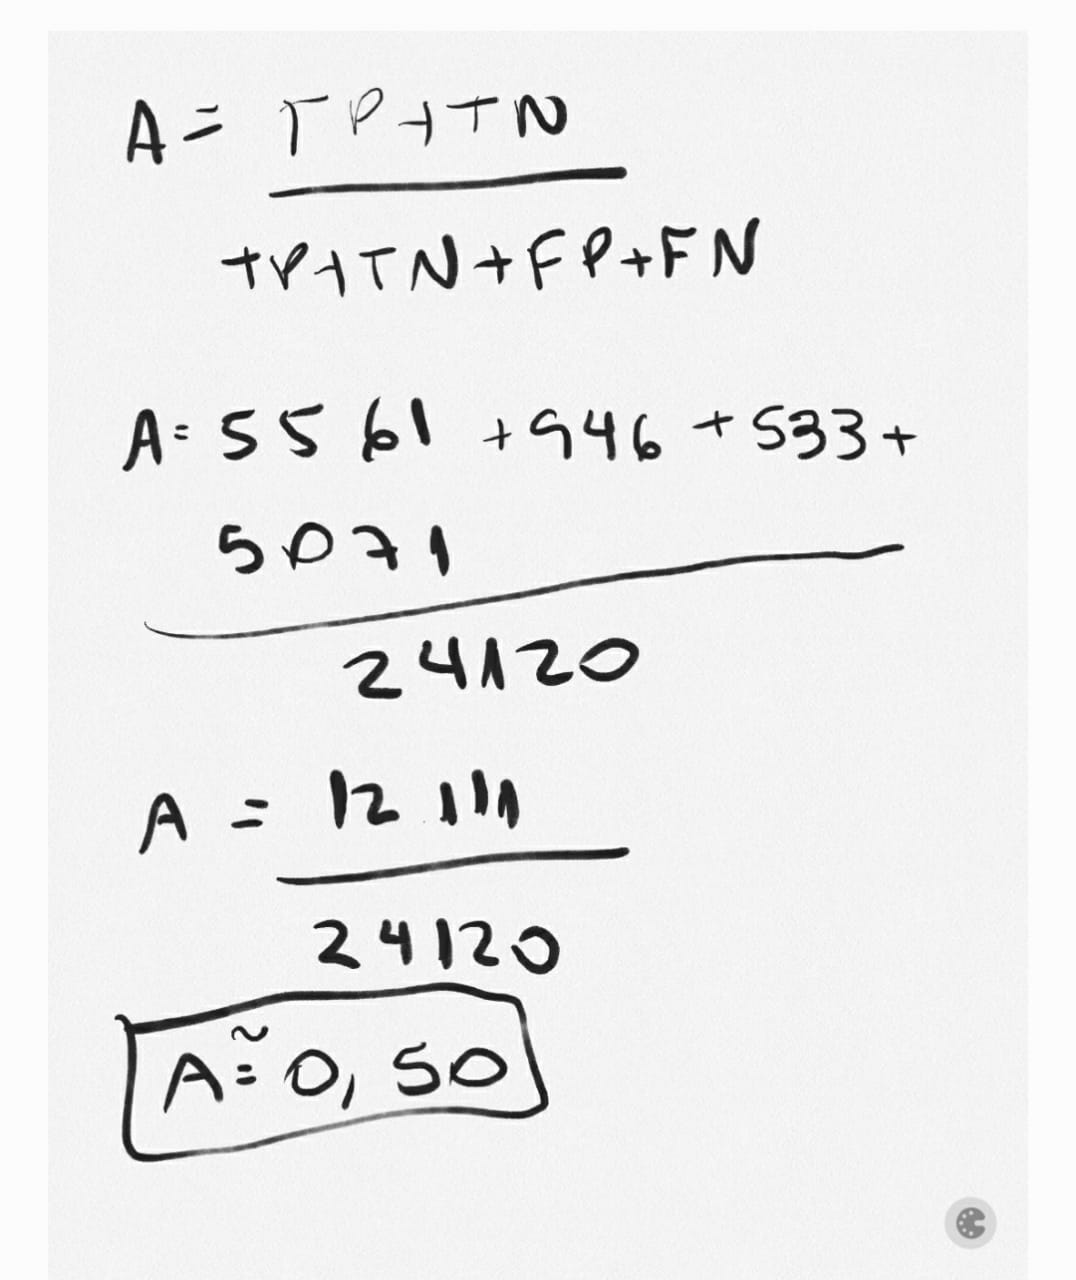

> ***Accuracy:*** aproximadamente 50% de acerto  


**Ciências**

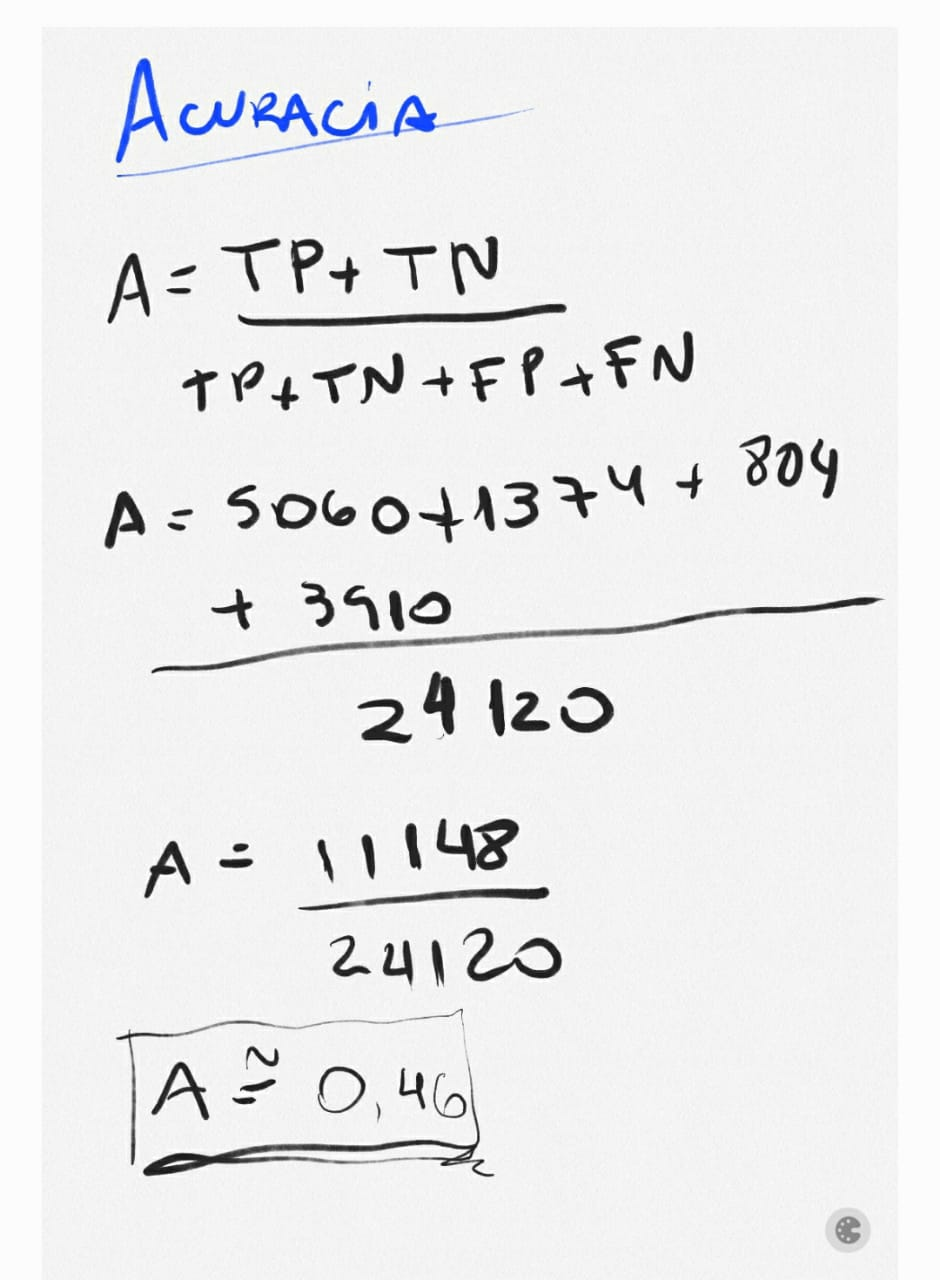

> ***Accuracy:*** aproximadamente 46% de acerto 
 

2. (0.5 point) Plot the cost function vs. number of epochs in the training/validation set and analyze the model. 

In [ ]:
import numpy as np
from sklearn.linear_model import SGDClassifier
from random import random
import matplotlib.pyplot as plt
import itertools

a_lp = []
b_lp = []
a_mat = []
b_mat = []
a_cie = []
b_cie = []

for iteration in [5, 100, 200, 300, 400, 500, 600, 700]:
  model_lp_sgd = SGDClassifier(max_iter=iteration,loss="log",class_weight='balanced')
  model_lp_sgd.fit(X_train_lp, y_train_lp)
  y_lp_pred = model_lp_sgd.predict(X_test_lp)
  x_lp = iteration
  y_lp = model_lp_sgd.score(X_test_lp, y_test_lp)
  a_lp.append(y_lp)
  b_lp.append(x_lp)

  model_mat_sgd = SGDClassifier(max_iter=iteration,loss="log",class_weight='balanced')
  model_mat_sgd.fit(X_train_mat, y_train_mat)
  y_mat_pred = model_mat_sgd.predict(X_test_mat)
  x_mat = iteration
  y_mat = model_mat_sgd.score(X_test_mat, y_test_mat)
  a_mat.append(y_mat)
  b_mat.append(x_mat)

  model_cie_sgd = SGDClassifier(max_iter=iteration,loss="log",class_weight='balanced')
  model_cie_sgd.fit(X_train_cie, y_train_cie)
  y_cie_pred = model_cie_sgd.predict(X_test_cie)
  x_cie = iteration
  y_cie = model_cie_sgd.score(X_test_cie, y_test_cie)
  a_cie.append(y_cie)
  b_cie.append(x_cie)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [ ]:
# TODO: Plot the cost function vs. number of iterations in the training set.

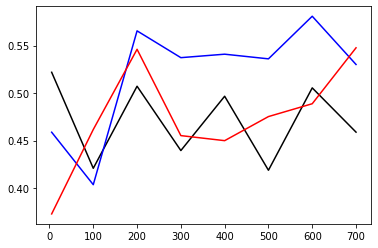

In [ ]:
##Vamos utilizar a saida do SGD classifier para calcular a função de custo
import matplotlib.pyplot as plt
import numpy as np

plt.plot(b_lp, a_lp, color='black');
plt.plot(b_mat, a_mat, color='blue');
plt.plot(b_cie, a_cie, color='red');


> What are the conclusions? (1-2 paragraphs)


3. (0.75 point) Pick **your best model** and plot the confusion matrix in the **test set**. 


In [ ]:
# TODO: Plot the confusion matrix. You can use scikit-learn, seaborn, matplotlib libraries.

In [ ]:
teste_aux = clean_data(teste)

##Processing
aux = teste_aux.select_dtypes('object')
encoded = preprocessing.LabelEncoder()
aux = aux.apply(encoded.fit_transform)
teste_aux = pd.concat([teste_aux.select_dtypes(['float64', 'int64']), aux], axis=1)

target_mat = teste_aux['nivel_profic_mat']
target_cie = teste_aux['nivel_profic_cie']

feature_target_mat = teste_aux.drop(['porc_ACERT_MAT', 'porc_ACERT_CIE','porc_ACERT_lp','nivel_profic_mat'], axis = 1)
feature_target_cie = teste_aux.drop(['porc_ACERT_MAT', 'porc_ACERT_CIE','porc_ACERT_lp','nivel_profic_cie'], axis = 1)

In [ ]:
predicted_mat = model_mat.predict(feature_target_mat)
predicted_cie = model_cie.predict(feature_target_cie)

In [ ]:
predicted_mat.shape[0]

1000

In [ ]:
target_mat.shape[0]

1000

In [ ]:
target_names = ['class 0', 'class 1', 'class 2','Class 3']
print(classification_report(target_mat, predicted_mat, target_names=target_names))
print(classification_report(target_cie, predicted_cie, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.64      0.59      0.62       402
     class 1       0.28      0.34      0.31       134
     class 2       0.16      0.56      0.25        41
     Class 3       0.54      0.41      0.47       423

    accuracy                           0.48      1000
   macro avg       0.41      0.48      0.41      1000
weighted avg       0.53      0.48      0.50      1000

              precision    recall  f1-score   support

     class 0       0.58      0.73      0.64       304
     class 1       0.29      0.22      0.25       205
     class 2       0.17      0.58      0.26        57
     Class 3       0.59      0.36      0.45       434

    accuracy                           0.46      1000
   macro avg       0.41      0.47      0.40      1000
weighted avg       0.50      0.46      0.46      1000



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


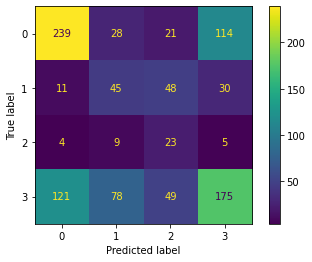

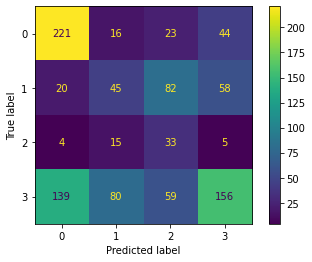

In [ ]:
plot_confusion_matrix(model_mat, feature_target_mat, target_mat)
plot_confusion_matrix(model_cie, feature_target_cie, target_cie)

> What are the conclusions? (1-2 paragraphs)


> Todos nossos modelos tiveram uma má performance. 

> Quando contruímos o modelo sem a utilização de frameworks conseguimos sentir uma dificuldade com relação a processamento do modelo, no nosso caso, não foi possível rodar por mais de 50 iterações, e a implementação de muitas técnicas que já são utilizadas como padrão em frameworks , como sklearn, também fizeram com que o modelo perdesse acurácia e até mesmo apresentasse um comportamento randômico quando apresentado a novos dados. 

>O modelo SGDRegressor foi o pior dos modelos, dos utilizados com implementações de framework, mesmo mudando os parâmetros de learning rate, o modelo não apresentou nenhuma melhoria. 


> Conseguimos identificar que o modelo polinomial precisaria ser aplicado alguamas outras técnicas para redução de dimensionalidade pois é muito custoso, na questão de uso de recurso, para treinar um modelo com tantas features de entrada.


> Rodamos nossos modelos com todas as features (tratadas) e tivemos uma avaliação do modelo abaixo com relação à quando retiramos alguns deles que a matriz de correlação identificou como aproximadamente 0 de relação com nossas targets. Outro ponto com relação aos dados é que dentro de uma feature que criamos a partir da data de nascimento continham outliers que também podem ter influênciado o resultado final.

> As relações mais fortes apresentadas pela matriz de correlação eram entre as próprias variáveis target.

## Deadline

Monday, September 19, 11:59 pm. 

Penalty policy for late submission: You are not encouraged to submit your assignment after due date. However, in case you do, your grade will be penalized as follows:
- September 20, 11:59 pm : grade * 0.75
- September 21, 11:59 pm : grade * 0.5
- September 22, 11:59 pm : grade * 0.25


## Submission

On Google Classroom, submit your Jupyter Notebook (in Portuguese or English).

**This activity is NOT individual, it must be done in pairs (two-person group).**